In [231]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re 
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from textblob import TextBlob
from sklearn.cluster import KMeans
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder

In [59]:
uncleaned_data = pd.read_excel("/Users/student/Desktop/2021143/chatgpt1.xlsx")
uncleaned_data.head()

,Datetime,Tweet Id,Text,Username,Permalink,User,Outlinks,CountLinks,ReplyCount,RetweetCount,LikeCount,QuoteCount,ConversationId,Language,Source,Media,QuotedTweet,MentionedUsers,hashtag,hastag_counts
0,2023-01-22 13:44:34+00:00,1617156270871689984,ChatGPTã§éŠã¶ã®å¿˜ã‚Œã¦ãŸï¼ï¼\næ›¸é¡žä...,mochico0123,https://twitter.com/mochico0123/status/1617156...,https://twitter.com/mochico0123,NaN,NaN,1,0,5,0,1617156270871689984,ja,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,[],0
1,2023-01-22 13:44:39+00:00,1617156291046129920,@AlexandrovnaIng Prohibition of ChatGPT has be...,Caput_LupinumSG,https://twitter.com/Caput_LupinumSG/status/161...,https://twitter.com/Caput_LupinumSG,NaN,NaN,1,0,5,0,1617148639993799936,en,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,"[User(username='AlexandrovnaIng', id=282705900...",[],0
2,2023-01-22 13:44:44+00:00,1617156308926340096,"Schaut Euch an, was @fobizz @DianaKnodel alles...",ciffi,https://twitter.com/ciffi/status/1617156308926...,https://twitter.com/ciffi,['https://us02web.zoom.us/webinar/register/801...,"['https://t.co/DsoeVJrPBp', 'https://t.co/HflT...",0,0,4,0,1617156308926340096,de,"<a href=""http://twitter.com/#!/download/ipad"" ...",[Photo(previewUrl='https://pbs.twimg.com/media...,https://twitter.com/DianaKnodel/status/1617153...,"[User(username='fobizz', id=884708145792253952...",['#ChatGPT'],1
3,2023-01-22 13:44:49+00:00,1617156332297250048,Bow down to chatGPT ðŸ«¡..... https://t.co/ENT...,Vishwasrisiri,https://twitter.com/Vishwasrisiri/status/16171...,https://twitter.com/Vishwasrisiri,['https://twitter.com/agadmator/status/1617155...,['https://t.co/ENTSzi2AQ9'],0,0,2,0,1617156332297250048,en,"<a href=""http://twitter.com/download/android"" ...",NaN,https://twitter.com/agadmator/status/161715501...,NaN,[],0
4,2023-01-22 13:44:52+00:00,1617156345064570112,"Profilinde vatan, TÃ¼rkiye falan yazan bireyle...",0xGenetikciniz,https://twitter.com/0xGenetikciniz/status/1617...,https://twitter.com/0xGenetikciniz,NaN,NaN,0,0,4,0,1617156345064570112,tr,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,[],0


In [60]:
uncleaned_data.isnull().sum()

Datetime              0
Tweet Id              0
Text                  5
Username              0
Permalink             0
User                  0
Outlinks          30059
CountLinks        30059
ReplyCount            0
RetweetCount          0
LikeCount             0
QuoteCount            0
ConversationId        0
Language              0
Source                0
Media             40499
QuotedTweet       46438
MentionedUsers    32832
hashtag               0
hastag_counts         0
dtype: int64

In [61]:
cleaned = uncleaned_data.dropna()

In [100]:
new_cleaned = cleaned.copy()

In [101]:
def clean_text(text):
    text = re.sub(r'@[A-Z_a-z_0-9_]+', '', text)
    text = re.sub(r'https?:\/\/\S+', '', text)
    text = re.sub(r'#', '', text)     
    text = text.lower()
    return text

new_cleaned['Text'] = cleaned['Text'].apply(clean_text)
new_cleaned

,Datetime,Tweet Id,Text,Username,Permalink,User,Outlinks,CountLinks,ReplyCount,RetweetCount,LikeCount,QuoteCount,ConversationId,Language,Source,Media,QuotedTweet,MentionedUsers,hashtag,hastag_counts
2,2023-01-22 13:44:44+00:00,1617156308926340096,"schaut euch an, was alles â¬‡ï¸ auf die pis...",ciffi,https://twitter.com/ciffi/status/1617156308926...,https://twitter.com/ciffi,['https://us02web.zoom.us/webinar/register/801...,"['https://t.co/DsoeVJrPBp', 'https://t.co/HflT...",0,0,4,0,1617156308926340096,de,"<a href=""http://twitter.com/#!/download/ipad"" ...",[Photo(previewUrl='https://pbs.twimg.com/media...,https://twitter.com/DianaKnodel/status/1617153...,"[User(username='fobizz', id=884708145792253952...",['#ChatGPT'],1
392,2023-01-22 14:08:23+00:00,1617162263273600000,chatgpt does!,Why_So_Trill,https://twitter.com/Why_So_Trill/status/161716...,https://twitter.com/Why_So_Trill,['https://twitter.com/vcrussell/status/1617154...,['https://t.co/MlMO00Vg8A'],0,0,2,0,1617162263273600000,en,"<a href=""http://twitter.com/download/iphone"" r...",[Photo(previewUrl='https://pbs.twimg.com/media...,https://twitter.com/VCRussell/status/161715463...,"[User(username='OpenAI', id=4398626122, displa...",[],0
1120,2023-01-22 14:44:37+00:00,1617171380306319872,"mieux que la chatgpt, le chat cgt dit les term...",gregors_mac,https://twitter.com/gregors_mac/status/1617171...,https://twitter.com/gregors_mac,['https://twitter.com/vinceflibustier/status/1...,['https://t.co/yspDUyMhZj'],1,0,2,0,1617171380306319872,fr,"<a href=""http://twitter.com/download/android"" ...",[Photo(previewUrl='https://pbs.twimg.com/media...,https://twitter.com/vinceflibustier/status/161...,"[User(username='ManaProd', id=7097744297866772...",[],0
1209,2023-01-22 14:49:03+00:00,1617172498822439936,rt:(): generative ai chatgpt is going to be ev...,yova,https://twitter.com/yova/status/16171724988224...,https://twitter.com/yova,['https://www.forbes.com/sites/lanceeliot/2023...,"['https://t.co/iQt3grQJTd', 'https://t.co/xHu8...",0,0,0,0,1617172498822439936,en,"<a href=""https://ifttt.com"" rel=""nofollow"">IFT...",[Photo(previewUrl='https://pbs.twimg.com/media...,https://twitter.com/ForbesTech/status/16171696...,"[User(username='ForbesTech', id=14885549, disp...","['#weatherguy', '#forbesTech', '#technology', ...",4
1424,2023-01-22 15:00:11+00:00,1617175299195830016,breakthrough!\n$gm implications\n\nchatgpt clo...,ConnectingODots,https://twitter.com/ConnectingODots/status/161...,https://twitter.com/ConnectingODots,['https://twitter.com/GRDecter/status/16171631...,['https://t.co/BECBeuc4qv'],4,4,41,0,1617175299195830016,en,"<a href=""http://twitter.com/download/android"" ...",[Gif(thumbnailUrl='https://pbs.twimg.com/tweet...,https://twitter.com/GRDecter/status/1617163150...,"[User(username='mtbarra', id=1219824320, displ...",['#MaryLed'],1
4802,2023-01-22 18:07:51+00:00,1617222526689590016,ðÿ¤ª est-ce que chatgpt m'a donnã© des idã©es ...,yOyO38,https://twitter.com/yOyO38/status/161722252668...,https://twitter.com/yOyO38,['https://twitter.com/yOyO38/status/1617161458...,['https://t.co/hKpwuFKq3x'],2,3,19,0,1617222526689590016,fr,"<a href=""https://mobile.twitter.com"" rel=""nofo...",[Video(thumbnailUrl='https://pbs.twimg.com/ext...,https://twitter.com/yOyO38/status/161716145896...,"[User(username='Yousignfr', id=1481783244, dis...",[],0
4852,2023-01-22 18:10:56+00:00,1617223302262419968,more on 's chatgpt competitor from . â¤µï¸\n...,DataChaz,https://twitter.com/DataChaz/status/1617223302...,https://twitter.com/DataChaz,['https://time.com/6246119/demis-hassabis-deep...,"['https://t.co/PZisLylfIU', 'https://t.co/CQng...",1,12,57,2,1617223302262419968,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",[Photo(previewUrl='https://pbs.twimg.com/media...,https://twitter.com/DataChaz/status/1617085963...,"[User(username='Google', id=20536157, displayn...","['#ChatGPT', '#Sparrow,']",2
5304,2023-01-22 18:40:42+00:00,1617230791494220032,chatgpt se perfeccionã³ sobre gpt-3.5 medi

Task 2


In [103]:
def thorough_clean(text):
  text = re.sub('[^A-Za-z0-9]', ' ', text)
  return(text)

new_cleaned['Text'] = raw_tweets['Text'].apply(thorough_clean)
new_cleaned

,Datetime,Tweet Id,Text,Username,Permalink,User,Outlinks,CountLinks,ReplyCount,RetweetCount,LikeCount,QuoteCount,ConversationId,Language,Source,Media,QuotedTweet,MentionedUsers,hashtag,hastag_counts
2,2023-01-22 13:44:44+00:00,1617156308926340096,Schaut Euch an was fobizz DianaKnodel alles...,ciffi,https://twitter.com/ciffi/status/1617156308926...,https://twitter.com/ciffi,['https://us02web.zoom.us/webinar/register/801...,"['https://t.co/DsoeVJrPBp', 'https://t.co/HflT...",0,0,4,0,1617156308926340096,de,"<a href=""http://twitter.com/#!/download/ipad"" ...",[Photo(previewUrl='https://pbs.twimg.com/media...,https://twitter.com/DianaKnodel/status/1617153...,"[User(username='fobizz', id=884708145792253952...",['#ChatGPT'],1
392,2023-01-22 14:08:23+00:00,1617162263273600000,OpenAI ChatGPT does https t co MlMO00Vg8A ...,Why_So_Trill,https://twitter.com/Why_So_Trill/status/161716...,https://twitter.com/Why_So_Trill,['https://twitter.com/vcrussell/status/1617154...,['https://t.co/MlMO00Vg8A'],0,0,2,0,1617162263273600000,en,"<a href=""http://twitter.com/download/iphone"" r...",[Photo(previewUrl='https://pbs.twimg.com/media...,https://twitter.com/VCRussell/status/161715463...,"[User(username='OpenAI', id=4398626122, displa...",[],0
1120,2023-01-22 14:44:37+00:00,1617171380306319872,Mieux que la chatgpt le chat CGT dit les Term...,gregors_mac,https://twitter.com/gregors_mac/status/1617171...,https://twitter.com/gregors_mac,['https://twitter.com/vinceflibustier/status/1...,['https://t.co/yspDUyMhZj'],1,0,2,0,1617171380306319872,fr,"<a href=""http://twitter.com/download/android"" ...",[Photo(previewUrl='https://pbs.twimg.com/media...,https://twitter.com/vinceflibustier/status/161...,"[User(username='ManaProd', id=7097744297866772...",[],0
1209,2023-01-22 14:49:03+00:00,1617172498822439936,RT ForbesTech Generative AI ChatGPT Is Goi...,yova,https://twitter.com/yova/status/16171724988224...,https://twitter.com/yova,['https://www.forbes.com/sites/lanceeliot/2023...,"['https://t.co/iQt3grQJTd', 'https://t.co/xHu8...",0,0,0,0,1617172498822439936,en,"<a href=""https://ifttt.com"" rel=""nofollow"">IFT...",[Photo(previewUrl='https://pbs.twimg.com/media...,https://twitter.com/ForbesTech/status/16171696...,"[User(username='ForbesTech', id=14885549, disp...","['#weatherguy', '#forbesTech', '#technology', ...",4
1424,2023-01-22 15:00:11+00:00,1617175299195830016,BREAKTHROUGH GM implications ChatGPT close ...,ConnectingODots,https://twitter.com/ConnectingODots/status/161...,https://twitter.com/ConnectingODots,['https://twitter.com/GRDecter/status/16171631...,['https://t.co/BECBeuc4qv'],4,4,41,0,1617175299195830016,en,"<a href=""http://twitter.com/download/android"" ...",[Gif(thumbnailUrl='https://pbs.twimg.com/tweet...,https://twitter.com/GRDecter/status/1617163150...,"[User(username='mtbarra', id=1219824320, displ...",['#MaryLed'],1
4802,2023-01-22 18:07:51+00:00,1617222526689590016,Est ce que ChatGPT m a donn des id es ...,yOyO38,https://twitter.com/yOyO38/status/161722252668...,https://twitter.com/yOyO38,['https://twitter.com/yOyO38/status/1617161458...,['https://t.co/hKpwuFKq3x'],2,3,19,0,1617222526689590016,fr,"<a href=""https://mobile.twitter.com"" rel=""nofo...",[Video(thumbnailUrl='https://pbs.twimg.com/ext...,https://twitter.com/yOyO38/status/161716145896...,"[User(username='Yousignfr', id=1481783244, dis...",[],0
4852,2023-01-22 18:10:56+00:00,1617223302262419968,More on Google s DeepMind ChatGPT competito...,DataChaz,https://twitter.com/DataChaz/status/1617223302...,https://twitter.com/DataChaz,['https://time.com/6246119/demis-hassabis-deep...,"['https://t.co/PZisLylfIU', 'https://t.co/CQng...",1,12,57,2,1617223302262419968,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",[Photo(previewUrl='https://pbs.twimg.com/media...,https://twitter.com/DataChaz/status/1617085963...,"[User(username='Google', id=20536157, displayn...","['#ChatGPT', '#Sparrow,']",2
5304,2023-01-22 18:40:42+00:00,1617230791494220032,ChatGPT se perfeccion sobre GPT 3

In [170]:
stop_words = set(stopwords.words('english'))
def remove_stop_words(text):
    tokens = word_tokenize(text)
    filtered_words = [word for word in tokens if word.casefold() not in stop_words]
    filtered_sentence = ' '.join(filtered_words)
    return filtered_sentence

In [171]:
new_cleaned['Text'] = new_cleaned['Text'].apply(remove_stop_words)

In [177]:
final_tweets['Text'] = new_cleaned['Text']

# Sentimental Analysis

In [189]:
def get_subjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def get_polarity(text):
  return TextBlob(text).sentiment.polarity

final_tweets['subjectivity'] = final_tweets['Text'].apply(get_subjectivity)
final_tweets['polarity'] = final_tweets['Text'].apply(get_polarity)
print('Polarity\n', final_tweets['polarity'])
print('\nSubjectivity\n', final_tweets['subjectivity'])

Polarity
 2        0.136364
392      0.000000
1120     0.000000
1209     0.000000
1424     0.425000
4802     0.350000
4852     0.000000
5304     0.000000
5369     0.170536
8066    -0.025000
9622     0.650000
10907    0.050000
11405    0.500000
13818    0.500000
16118    0.000000
18025    0.000000
18668   -0.600000
19239    0.200000
20244    0.245833
21958    0.287500
24426    0.000000
24536    0.000000
26207    0.000000
26552    0.000000
27779    0.000000
28655    0.000000
29053    0.350000
29636    0.200000
30570   -0.076951
31181    0.000000
33281   -0.062500
33590    0.000000
34569    0.000000
35671    0.075000
36085    0.000000
37147    0.450000
39039    0.000000
39331    0.000000
40830    0.800000
42689    0.000000
43480   -0.052083
44554    0.133333
46911    0.000000
48135   -0.033333
Name: Text, dtype: float64

Subjectivity
 2        0.500000
392      0.000000
1120     0.000000
1209     0.000000
1424     0.525000
4802     0.650000
4852     1.000000
5304     0.000000
5369     0.5

In [193]:
def getanalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  elif score > 0:
      return 'Positive'

final_tweets['Text'] = final_tweets['polarity'].apply(getanalysis) 
final_tweets['Text']

2        Positive
392       Neutral
1120      Neutral
1209      Neutral
1424     Positive
4802     Positive
4852      Neutral
5304      Neutral
5369     Positive
8066     Negative
9622     Positive
10907    Positive
11405    Positive
13818    Positive
16118     Neutral
18025     Neutral
18668    Negative
19239    Positive
20244    Positive
21958    Positive
24426     Neutral
24536     Neutral
26207     Neutral
26552     Neutral
27779     Neutral
28655     Neutral
29053    Positive
29636    Positive
30570    Negative
31181     Neutral
33281    Negative
33590     Neutral
34569     Neutral
35671    Positive
36085     Neutral
37147    Positive
39039     Neutral
39331     Neutral
40830    Positive
42689     Neutral
43480    Negative
44554    Positive
46911     Neutral
48135    Negative
Name: Text, dtype: object

In [211]:
x_train, x_test, y_train, y_test = train_test_split(final_tweets['Text'], new_cleaned['Username'], test_size=0.2, random_state=42)

# train_test_split function splits x and y into x_train, x_test, y_train, y_test
# test_size=0.2 specifies that 20% of the data will be used for testing
# random_state=42 ensures reproducibility of the split (you can use any random state value)

# Verify the shapes of the resulting datasets
print("Training data shape:", x_train.shape, y_train.shape)
print("Test data shape:", x_test.shape, y_test.shape)

Training data shape: (35,) (35,)
Test data shape: (9,) (9,)


# User Classifcation

In [212]:
preprocessed_tweets = x_train

vectorizer_tweets = TfidfVectorizer()
tfidf_features = vectorizer_tweets.fit_transform(preprocessed_tweets)


preprocessed_usernames = y_train

vectorizer_usernames = TfidfVectorizer()
tfidf_usernames = vectorizer_usernames.fit_transform(preprocessed_usernames)

In [213]:
x = tfidf_features
y = tfidf_usernames.toarray()

In [214]:
classifier = RandomForestClassifier()
classifier.fit(x, y)


RandomForestClassifier()

In [215]:
new_tweet_text = x_test

# Convert preprocessed tweet text into TF-IDF features
new_tfidf_features = vectorizer_tweets.transform(x_test)

# Make predictions using the Random Forest classifier
new_username_tfidf = classifier.predict(new_tfidf_features)
predicted_usernames = vectorizer_usernames.inverse_transform(new_username_tfidf)

# Print predicted usernames for the new tweet text
print(predicted_usernames)



[array([], dtype='<U15'), array([], dtype='<U15'), array([], dtype='<U15'), array([], dtype='<U15'), array([], dtype='<U15'), array([], dtype='<U15'), array([], dtype='<U15'), array([], dtype='<U15'), array([], dtype='<U15')]


# Clustering

In [216]:
preprocessed_tweets = x_train

# Convert preprocessed tweet text into TF-IDF features
vectorizer = TfidfVectorizer()
tfidf_features = vectorizer.fit_transform(preprocessed_tweets)
num_clusters = 5  # Specify the desired number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(tfidf_features)

cluster_labels = kmeans.labels_
print(cluster_labels)
#The labels indicate which cluster each data point belongs to

[1 1 0 1 0 0 0 0 1 2 2 2 0 0 1 1 0 0 1 1 1 1 1 0 1 0 0 1 0 2 1 1 1 2 0]


/var/folders/ph/d5rkl1m93176xgtl24l7gfqr0000gn/T/ipykernel_1020/2683756306.py:8: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  kmeans.fit(tfidf_features)


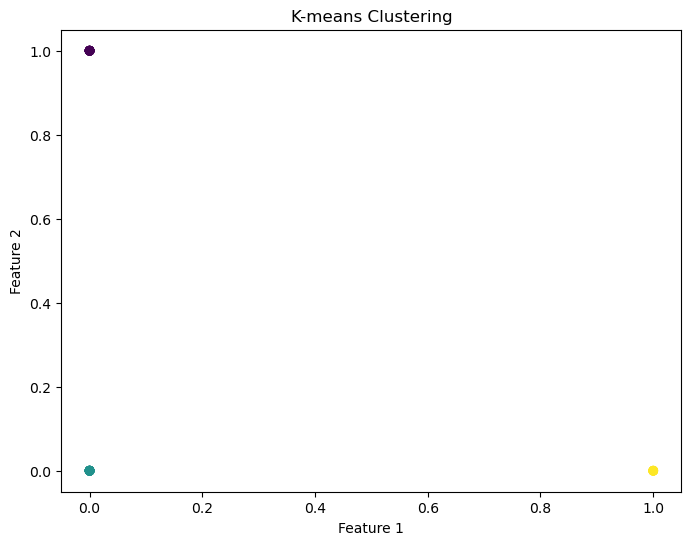

<Figure size 640x480 with 0 Axes>

In [259]:
import matplotlib.pyplot as plt

# Assuming you have cluster_labels containing the cluster assignments

# Get the coordinates for plotting
x = tfidf_features.toarray()
y = cluster_labels
plt.figure(figsize=(8, 6))
# Plot the clusters
plt.scatter(x[:, 0], x[:, 2], c=y, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-means Clustering')
plt.show()
plt.savefig('Cluster')

# Engagement Prediction

In [315]:
b_train, b_test = train_test_split(new_cleaned['LikeCount'], test_size=0.2, random_state=42)


In [322]:
vectorizer = TfidfVectorizer()
tfidf_features = vectorizer.fit_transform(a_train)
b_train_encoded = label_encoder.fit_transform(a_train)
tfidf_features = vectorizer.fit_transform(x_train)
x_train_encoded = label_encoder.fit_transform(x_train)


In [323]:
# Create a Gaussian Naive Bayes classifier
naive_bayes = GaussianNB()
Y = np.array(b_train_encoded).ravel()
naive_bayes.fit(x_train, Y)

ValueError: could not convert string to float: 'Neutral'

In [308]:
b_train_encoded = label_encoder.transform(a_test)
y_pred_encoded = naive_bayes.predict(b_train_encoded)
y_pred = label_encoder.inverse_transform(y_pred_encoded)
print(y_pred)


ValueError: Expected 2D array, got 1D array instead:
array=[1 1 1 1 1 0 2 2 2].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

# Hashtag Analysis

In [309]:
a_train, a_test = train_test_split(new_cleaned['hashtag'], test_size=0.2, random_state=42)

# Verify the shapes of the resulting datasets
print("Training data shape:", a_train.shape)
print("Test data shape:", a_test.shape)

Training data shape: (35,)
Test data shape: (9,)


In [314]:
preprocessed_hashtags = a_train
vectorizer = TfidfVectorizer()
tfidf_features = vectorizer.fit_transform(preprocessed_hashtags)
num_clusters = 5  # Specify the desired number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(tfidf_features)
cluster_labels = kmeans.labels_
for cluster_id in range(num_clusters):
    cluster_hashtags = [preprocessed_hashtags[i] for i, label in enumerate(cluster_labels) if label == cluster_id]
    print(f"Cluster {cluster_id+1}:")
    print(cluster_hashtags)
    print()


KeyError: 13